In [214]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sqlalchemy import create_engine

In [215]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'smooth' 
port = r'5432'
schema = r'raw'

db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [216]:
table_name = r'EPL Data'
schema = r'raw' # schema where the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [217]:
df.head(10)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
5,15/01/2025,2024/25,Arsenal,Tottenham,2,1,H,2.0,1.0,H,...,16.0,9.0,10.0,4.0,3.0,1.0,0.0,0.0,20250115,Premier League
6,14/01/2025,2024/25,Brentford,Man City,2,2,D,0.0,0.0,D,...,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,20250114,Premier League
7,14/01/2025,2024/25,Chelsea,Bournemouth,2,2,D,1.0,0.0,H,...,15.0,16.0,9.0,3.0,2.0,3.0,0.0,0.0,20250114,Premier League
8,14/01/2025,2024/25,West Ham,Fulham,3,2,H,2.0,0.0,H,...,9.0,18.0,0.0,3.0,3.0,3.0,0.0,0.0,20250114,Premier League
9,14/01/2025,2024/25,Nott'm Forest,Liverpool,1,1,D,1.0,0.0,H,...,7.0,10.0,0.0,9.0,2.0,1.0,0.0,0.0,20250114,Premier League


In [218]:
df.shape

(12153, 25)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

changing FT Result column into numerical values

H=Home Win, D=Draw, A=Away Win

In [220]:
df['FT Result'] = df['FT Result'].map({'H': 1, 'D': 2, 'A': 3})  
df['HT Result'] = df['HT Result'].map({'H': 1, 'D': 2, 'A': 3})


In [221]:
df['FT Result']

0        3
1        1
2        3
3        3
4        1
        ..
12148    3
12149    1
12150    1
12151    1
12152    3
Name: FT Result, Length: 12153, dtype: int64

Analytical Question: How to compare the football performance of all teams.

### Create the new manual features

Goal Difference: (FTH Goals - FTA Goals)

This represents the team's performance in a match by calculating the goal difference.

In [222]:
df['Goal Difference'] = df['FTH Goals'] - df['FTA Goals']

Home Team Win Ratio: (H Goals / (H Goals + A Goals))

Shows the ratio of goals scored at home vs goals conceded by the opponent.


In [223]:
df['Home Win Ratio'] = df['FTH Goals'] - df['FTA Goals'] 

Fouls Differential: (H Fouls - A Fouls)

Shows the difference in fouls committed by the home and away teams.

In [224]:
df['Fouls Differential'] = df['H Fouls'] - df['A Fouls']

Yellow Cards Differential: (H Yellow - A Yellow)

Shows the difference in yellow cards between the home and away teams.

In [225]:
df['Yellow Cards Differential'] = df['H Yellow'] - df['A Yellow']

Red Cards Differential: (H Red - A Red)

Shows the difference in red cards between the home and away teams.

In [226]:
df['Red Cards Differential'] = df['H Red'] - df['A Red']

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       12153 non-null  object 
 1   Season                     12153 non-null  object 
 2   HomeTeam                   12153 non-null  object 
 3   AwayTeam                   12153 non-null  object 
 4   FTH Goals                  12153 non-null  int64  
 5   FTA Goals                  12153 non-null  int64  
 6   FT Result                  12153 non-null  int64  
 7   HTH Goals                  11229 non-null  float64
 8   HTA Goals                  11229 non-null  float64
 9   HT Result                  11229 non-null  float64
 10  Referee                    9329 non-null   object 
 11  H Shots                    9329 non-null   float64
 12  A Shots                    9329 non-null   float64
 13  H SOT                      9329 non-null   flo

In [228]:
print(df.isin([np.inf, -np.inf]).sum()) 

Date                         0
Season                       0
HomeTeam                     0
AwayTeam                     0
FTH Goals                    0
FTA Goals                    0
FT Result                    0
HTH Goals                    0
HTA Goals                    0
HT Result                    0
Referee                      0
H Shots                      0
A Shots                      0
H SOT                        0
A SOT                        0
H Fouls                      0
A Fouls                      0
H Corners                    0
A Corners                    0
H Yellow                     0
A Yellow                     0
H Red                        0
A Red                        0
Display_Order                0
League                       0
Goal Difference              0
Home Win Ratio               0
Fouls Differential           0
Yellow Cards Differential    0
Red Cards Differential       0
dtype: int64


In [229]:
print(df.isna().sum())  

Date                            0
Season                          0
HomeTeam                        0
AwayTeam                        0
FTH Goals                       0
FTA Goals                       0
FT Result                       0
HTH Goals                     924
HTA Goals                     924
HT Result                     924
Referee                      2824
H Shots                      2824
A Shots                      2824
H SOT                        2824
A SOT                        2824
H Fouls                      2824
A Fouls                      2824
H Corners                    2824
A Corners                    2824
H Yellow                     2824
A Yellow                     2824
H Red                        2824
A Red                        2824
Display_Order                   0
League                          0
Goal Difference                 0
Home Win Ratio                  0
Fouls Differential           2824
Yellow Cards Differential    2824
Red Cards Diff

In [230]:
df = df.dropna()

In [231]:
df = df.dropna(subset=['Fouls Differential', 'Yellow Cards Differential', 'Red Cards Differential'])

In [232]:
X = df[['Goal Difference', 'Home Win Ratio', 
        'Fouls Differential', 'Yellow Cards Differential', 'Red Cards Differential']]

y = df['HT Result']


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [235]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 56.22%


In [238]:
feature_importance = model.feature_importances_
print(len(feature_importance))  # Number of features in the model

5


In [239]:
feature_importance = model.feature_importances_
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': ['Goal Difference', 'Home Win Ratio', 
                'Fouls Differential', 'Yellow Cards Differential', 'Red Cards Differential'],
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                     Feature  Importance
2         Fouls Differential    0.322557
1             Home Win Ratio    0.254465
0            Goal Difference    0.231668
3  Yellow Cards Differential    0.149637
4     Red Cards Differential    0.041673


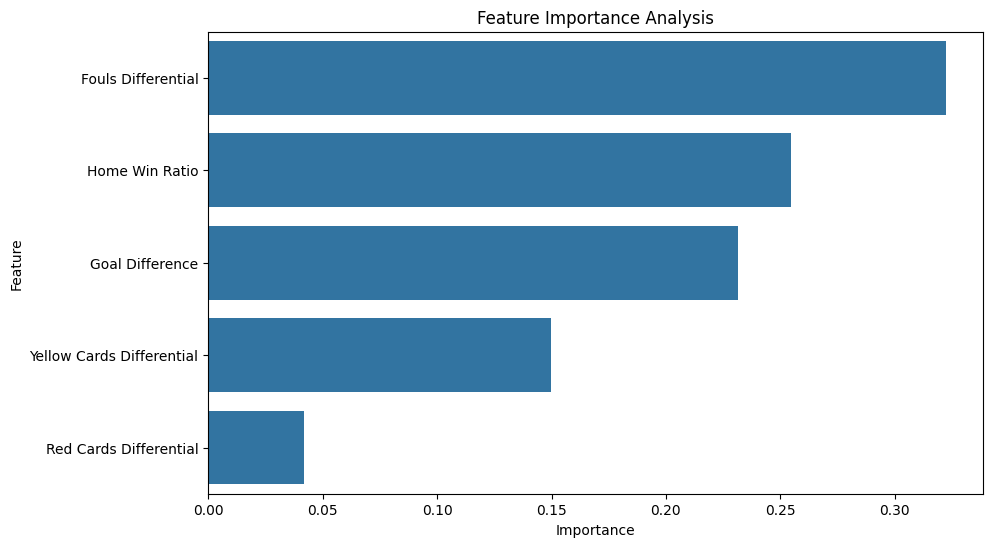

In [240]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance Analysis")
plt.show()

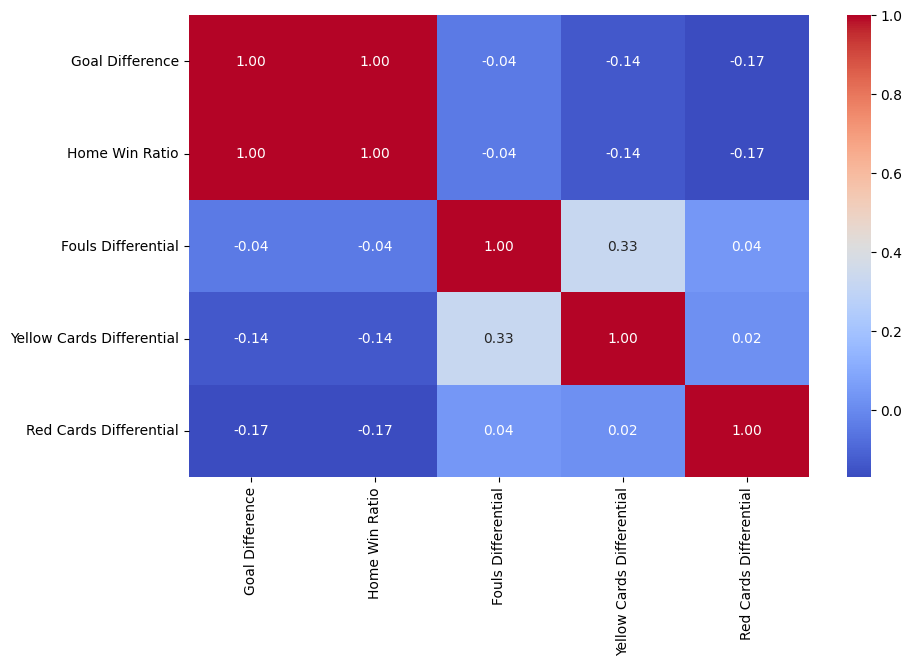

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


The new features, such as Goal Difference, Home Win Ratio, and other performance-related metrics, showed varying importance in the model. Using feature importance from the Random Forest model and a Principal Component (PC) Matrix, we were able to identify the relative impact of each feature. Features like Goal Difference had higher importance, indicating they were more influential in the model’s predictions, while others had lower importance. To evaluate the impact further, additional techniques like cross-validation and correlation heatmaps could provide insights into the model’s generalization ability and detect any redundancy among features. Redundant features with high correlation could contribute to overfitting, so removing highly correlated features or applying regularization techniques (such as max_depth for Random Forest) can help mitigate overfitting and improve the model's performance on unseen data.